<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import os
import sys
sys.path.insert(0, os.path.relpath('../')) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from super_simulation.super_simulation_factory import SuperSimulationFactory
from transition_table import TransitionTable
from spark_policy import SparkPolicy
from utils.spark_bq_utils import upload_spark_model_inputs
import pandas as pd
from functools import partial

pd.set_option('display.max_rows', 500)

In [58]:
# load population data

total_pop = pd.read_csv("../state/CA/CA_total_pop_by_crime_category.csv")
total_pop = total_pop.iloc[:, :6]

# load admissions data

admissions = pd.read_csv("../state/CA/CA_admissions_by_crime_category.csv")
admissions = admissions.iloc[:, :6]

Preprocess the data: make sure that the data types are right, the numbers are formatted properly, deal with missing values, etc.

In [60]:
# create month and year columns for total_pop

month_year = total_pop.Date.str.split(" " , n=1, expand = True)
total_pop["Month"], total_pop["Year"] = month_year.iloc[:, 0], month_year.iloc[:, 1]
total_pop = total_pop.drop("Date", axis = 1)

total_pop.Month = total_pop.index % 12 + 1

# another way to do this:
# month_to_number = {"January": 1, "February": 2, ...}
# total_pop.Month = total_pop.Month.map(month_to_number)

# a third way to do this:
# for i in range (len(total_pop)): 
#    total_pop.iloc[i,5] = i % 12 + 1

# create month and year columns for admissions table

month_year_admissions = admissions.Date.str.split(" " , n=1, expand = True)
admissions["Month"], admissions["Year"] = month_year_admissions.iloc[:, 0], month_year_admissions.iloc[:, 1]
admissions = admissions.drop("Date", axis = 1)

admissions.Month = admissions.index % 12 + 1

In [62]:
# remove commas from columns

def remove_commas(df, column_name):
    df[f"{column_name}"] = df[f"{column_name}"].apply(lambda x: x.replace(",", ""))

remove_commas(total_pop, "Crimes Against Persons")
remove_commas(total_pop, "Property Crimes")
remove_commas(total_pop, "Drug Crimes")
remove_commas(total_pop, "Other Crimes")

remove_commas(admissions, "Crimes Against Persons")
remove_commas(admissions, "Property Crimes")
remove_commas(admissions, "Drug Crimes")
remove_commas(admissions, "Other Crimes")

In [64]:
# check data types of columns in each df

total_pop.dtypes
admissions.dtypes

Crimes Against Persons      int64
Property Crimes             int64
Drug Crimes                 int64
Other Crimes                int64
Missing                   float64
Month                       int64
Year                        int64
dtype: object

In [69]:
# change types of total_pop columns, drop Missing column

total_pop = total_pop.astype(int)
total_pop = total_pop.drop("Missing", axis=1)

# replace x's and *'s in code, drop Missing column

admissions = admissions.replace("x", 0)
admissions = admissions.drop("Missing", axis=1)
admissions = admissions.replace("*", 5)
admissions = admissions.astype(int)

In [84]:
# add time step column, graph data

total_pop["time_step"] = total_pop.index
total_pop_chart = total_pop.drop(["Month", "Year"], axis=1).plot.bar(x='time_step', stacked=True)

admissions["time_step"] = total_pop.index
admissions_chart = admissions.drop(["Month", "Year"], axis=1).plot.bar(x='time_step', stacked=True)

In [112]:
# in the future: look at ARIMA line of best fit to make sure it makes sense

Next step: Transitions Data

In [ ]:
# how do you use total population and admissions data to get transitions data?

# total number of people
# number of people coming into prison
# goal: how long they stay in prison

# admissions * LOS = population

<AxesSubplot: >

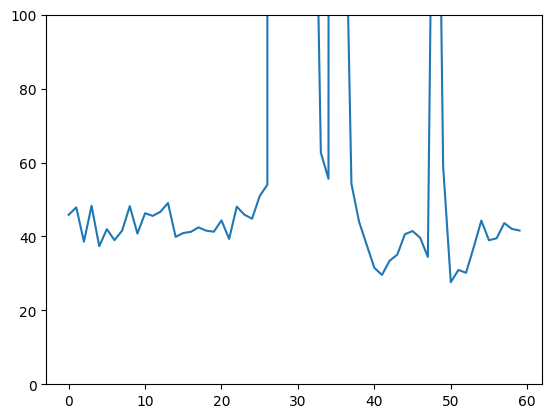

In [103]:
# plot average population / average admissions

(total_pop.iloc[:, 0:4].sum(axis=1) / admissions.iloc[:, 0:4].sum(axis=1)).plot(ylim = [0,100])